In [ ]:
BYO K-means

In [1]:
__author__ = 'fbb'
%pylab inline
import numpy as np
import pylab as pl
#import kmseg
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import json
import os
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [48]:
np.random.seed(46311)

In [63]:
x1 = np.random.randn(100,2)-2

In [64]:
x2 = np.random.randn(100,2)*.8

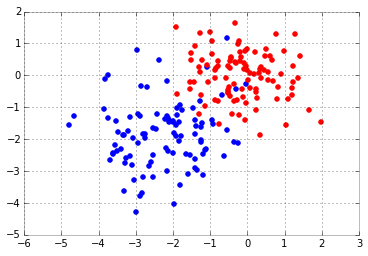

In [65]:
pl.scatter(x1[:,0],x1[:,1], color='b')
pl.scatter(x2[:,0],x2[:,1], color = 'r')


In [66]:
Nclusters = 2

In [70]:
print x1.shape
dataset = np.array([x1,x2])
print dataset.shape

(100, 2)
(2, 100, 2)


In [71]:
dataset = dataset.reshape(200,2)

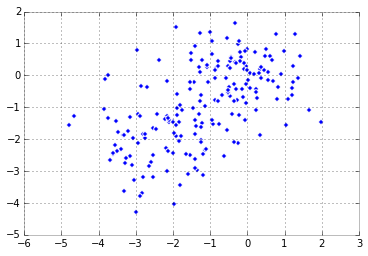

In [73]:
pl.scatter(dataset[:,0], dataset[:,1])

In [77]:
center1 = np.random.rand(2)

In [79]:
center2 = np.random.rand(2)

In [80]:
print center1, center2

[ 0.85394509  0.71933524] [ 0.1296869   0.64819063]


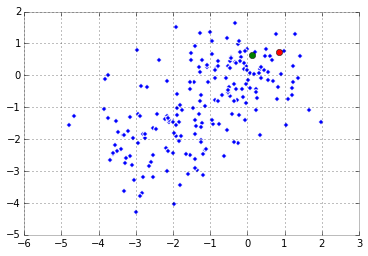

In [85]:
pl.scatter(dataset[:,0], dataset[:,1])
pl.plot(center1[0],center1[1], 'or')
pl.plot(center2[0],center2[1], 'og')

In [88]:
def distance(data, Kcenter):
    d = np.abs(data[:,0]-Kcenter[0])+np.abs(data[:,1]-Kcenter[1])
    return d

In [91]:
d1 = distance(dataset, center1)

In [92]:
d2 = distance(dataset, center2)

In [93]:
d1 < d2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,

In [94]:
C1 = dataset[d1<d2]
C2 = dataset[d1>=d2]


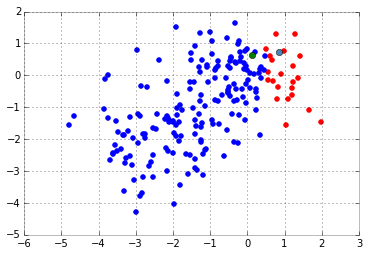

In [101]:
pl.scatter(C1[:,0],C1[:,1], color='r')
pl.scatter(C2[:,0],C2[:,1], color='b')
pl.plot(center1[0],center1[1], 'o')
pl.plot(center2[0],center2[1], 'og')

In [104]:
center11 = C1.mean(axis=0)
center21 = C2.mean(axis=0)

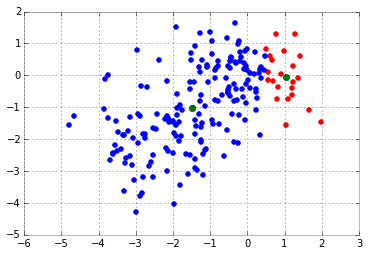

In [106]:
pl.scatter(C1[:,0],C1[:,1], color='r')
pl.scatter(C2[:,0],C2[:,1], color='b')
pl.plot(center11[0],center11[1], 'og')
pl.plot(center21[0],center21[1], 'og')